In [1]:
from pathlib import Path
from re import sub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set file path
file_path = Path('images/test')
file_path.mkdir(parents=True, exist_ok=True)

In [3]:
e_waste = pd.read_csv('data/Electronic Waste.csv')
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of 2,20,20,25,22,19,16
1,Put unwanted computers in the garbage 3,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers 3,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [4]:
e_waste['Electronic waste'] = e_waste['Electronic waste'].apply(lambda x: sub(f'\d+', '', x).strip())
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [5]:
e_waste = e_waste.replace('F', np.nan)
e_waste = e_waste.replace('..', np.nan)
for col in e_waste.columns[1:]:
    e_waste[col] = e_waste[col].apply(lambda x: sub(r'(\d+)E', r'\1', x) if type(x) is str else x)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,NaN,12,16,21,15,6
4,Donated or gave away unwanted computers,31,19,NaN,9,12,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16,23,22,32,34,46
79,Returned unwanted mercury-containing lights to...,9,13,7,NaN,8,8
80,Still had unwanted mercury-containing lights a...,15,10,15,22,16,15


In [6]:
e_waste = e_waste.astype(
    {'2011': float, '2013': float,
     '2015': float, '2017': float,
     '2019': float, '2021': float}
)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
3,Returned unwanted computers to a supplier or r...,NaN,12.0,16.0,21.0,15.0,6.0
4,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55.0,49.0,51.0,42.0,45.0,37.0
78,Took or sent unwanted mercury-containing light...,16.0,23.0,22.0,32.0,34.0,46.0
79,Returned unwanted mercury-containing lights to...,9.0,13.0,7.0,NaN,8.0,8.0
80,Still had unwanted mercury-containing lights a...,15.0,10.0,15.0,22.0,16.0,15.0


In [7]:
computers = e_waste[
    (e_waste['Electronic waste'].str.contains('computers')) &
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)
computers

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
2,Returned unwanted computers to a supplier or r...,NaN,12.0,16.0,21.0,15.0,6.0
3,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
4,Still had unwanted computers at the time of in...,28.0,34.0,26.0,29.0,27.0,23.0


In [8]:
had_unwanted = computers[computers['Electronic waste'] == 'Had unwanted computers to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,20.0,20.0,25.0,22.0,19.0,16.0


In [9]:
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,20.0
1,2013,20.0
2,2015,25.0
3,2017,22.0
4,2019,19.0
5,2021,16.0


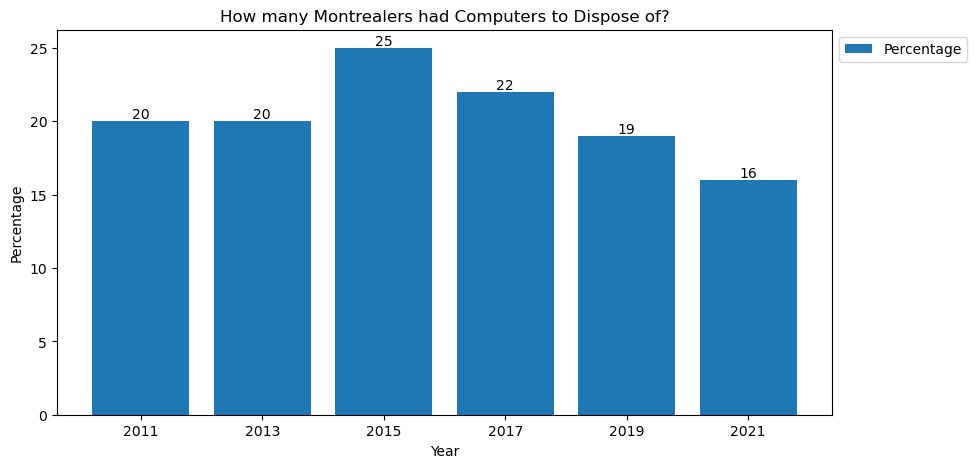

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)
plt.title("How many Montrealers had Computers to Dispose of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig(file_path / 'computers_main_plot.png', bbox_inches='tight')

In [11]:
computers_rest = computers.iloc[1:]
computers_rest

,Electronic waste,2011,2013,2015,2017,2019,2021
1,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
2,Returned unwanted computers to a supplier or r...,NaN,12.0,16.0,21.0,15.0,6.0
3,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
4,Still had unwanted computers at the time of in...,28.0,34.0,26.0,29.0,27.0,23.0


In [12]:
computers_rest = computers_rest.T
computers_rest

,1,2,3,4
Electronic waste,Took or sent unwanted computers to a depot or ...,Returned unwanted computers to a supplier or r...,Donated or gave away unwanted computers,Still had unwanted computers at the time of in...
2011,30.0,NaN,31.0,28.0
2013,30.0,12.0,19.0,34.0
2015,41.0,16.0,NaN,26.0
2017,44.0,21.0,9.0,29.0
2019,50.0,15.0,12.0,27.0
2021,67.0,6.0,16.0,23.0


In [13]:
computers_rest.columns = computers_rest.iloc[0].values

computers_rest = computers_rest.reset_index()
computers_rest = computers_rest.iloc[1:]
computers_rest = computers_rest.rename(columns={'index': 'Year'})
computers_rest

,Year,Took or sent unwanted computers to a depot or drop-off centre,Returned unwanted computers to a supplier or retailer,Donated or gave away unwanted computers,Still had unwanted computers at the time of interview
1,2011,30.0,NaN,31.0,28.0
2,2013,30.0,12.0,19.0,34.0
3,2015,41.0,16.0,NaN,26.0
4,2017,44.0,21.0,9.0,29.0
5,2019,50.0,15.0,12.0,27.0
6,2021,67.0,6.0,16.0,23.0


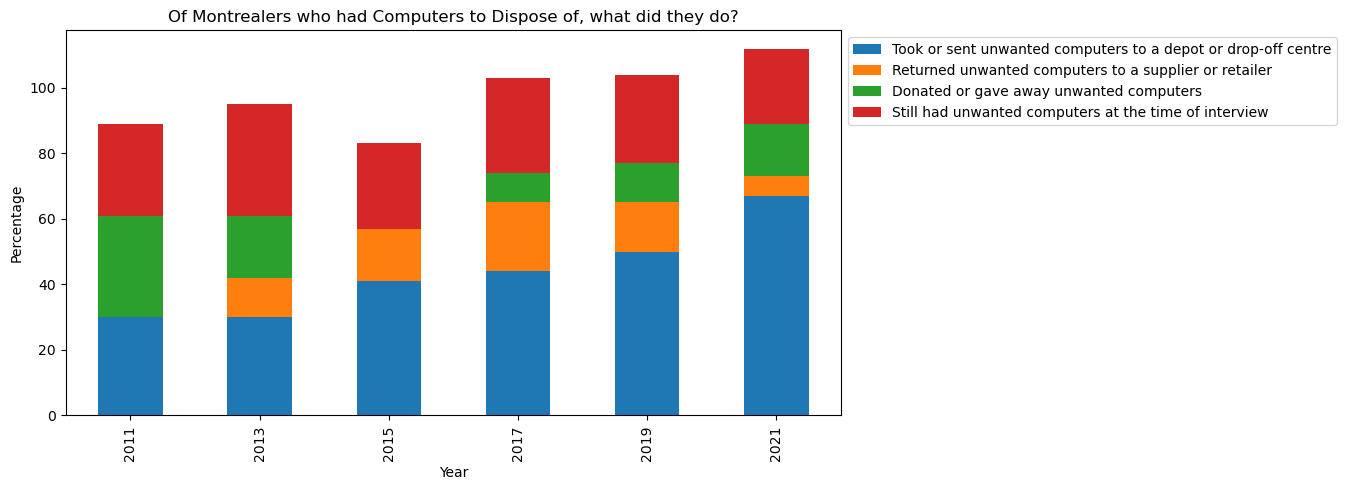

In [14]:
computers_rest.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers who had Computers to Dispose of, what did they do?")
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig(file_path / 'computers_stacked_plot.png', bbox_inches='tight')